Importamos bibliotecas importantes

In [1]:
#Librerias estandar para el preprocesamiento
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics

#Para visualizacion de datos.
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
%matplotlib inline

#importamos librerias para la evaluacion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import  roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Importamos librerias extra
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import RFECV
from sklearn.tree import export_graphviz

Cargamos el dataset.

In [77]:
data = pd.read_csv('data_smote.csv')
#data = pd.read_csv("data_drop.csv")
test = pd.read_csv('test.csv')

In [3]:
#Organizamos nuestros datos
X = data.drop("target",axis=1)
y = np.ravel(data["target"])
X_test = test.drop("target",axis=1)
y_test = np.ravel(test["target"])

In [4]:
#Instanciamos y normalizamos nuestros datos con el stdscaler
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

Importamos los modelos.

In [12]:
#Importacion
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier


## Logistic regression

In [7]:
estimator = LogisticRegression()
selector = RFECV(estimator, step=2, cv=2,n_jobs=-1)
selector = selector.fit(X, y)
y_pred = selector.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.80      0.86      4575
          1       0.56      0.82      0.67      1458

avg / total       0.84      0.80      0.81      6033



## GaussianNB

In [10]:
#Fiteamos el mejor modelo
model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X_test)
#Imprimimos el reporte de clasificacion del modelo
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.84      0.87      4575
          1       0.58      0.70      0.64      1458

avg / total       0.82      0.81      0.81      6033



## BernoulliNB

In [11]:
model = BernoulliNB()
model.fit(X,y)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.72      0.81      4575
          1       0.49      0.84      0.62      1458

avg / total       0.83      0.75      0.76      6033



In [20]:
#Instanciamos el pipeline que vamos a usar
lista_modelos = [GaussianNB,LogisticRegression,BernoulliNB,MultinomialNB,KNeighborsClassifier,svm.SVC]
a = 0
modelo_elegido = lista_modelos[a]
pipeline = Pipeline([
    ("model",modelo_elegido()),
])


In [18]:
estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
y_pred = selector.predict(X_test)
#Imprimimos el reporte de clasificacion con el mejor modelo
print(classification_report(y_test,y_pred))

In [19]:
y_pred = selector.predict(X_test)
#Imprimimos el reporte de clasificacion con el mejor modelo
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87      4575
          1       0.57      0.81      0.67      1458

avg / total       0.84      0.81      0.82      6033



## KVecinos

In [69]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

9 0.8223106248964032


             precision    recall  f1-score   support

          0       0.91      0.84      0.87      4575
          1       0.59      0.73      0.65      1458

avg / total       0.83      0.81      0.82      6033



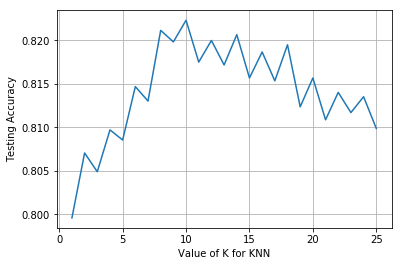

In [73]:
# ploteamos la relacion entre K y la precisión del test
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(26, 100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

0 0.8097132438256257


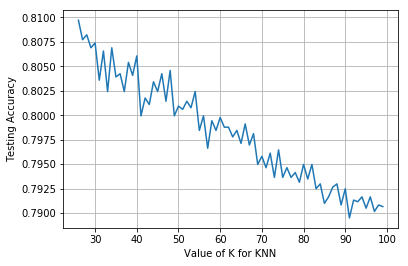

In [11]:
# ploteamos la relacion entre K y la precisión del test
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)


In [74]:
#Fiteamos el mejor modelo
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [75]:
#Imprimimos el reporte de clasificacion con el mejor modelo
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88      4575
          1       0.63      0.62      0.63      1458

avg / total       0.82      0.82      0.82      6033



## Randomsearch en svc

Mostramos el mejor score y el mejor set de parametros.

In [40]:
#Prueba 1: Score: 0.749 svc__C:0.47 svc_kernel:'linear'
print("Best score: %0.3f" % rand_search.best_score_)
print("Best parameters set:" )
best_parameters_rand = rand_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_rand[param_name])) 

Best score: 0.749
Best parameters set:
	 svc__C: 0.47
	 svc__kernel: 'linear'


Nos llevamos el mejor modelo.

In [41]:
model = rand_search.best_estimator_
pred = model.predict(X_test)

In [42]:

print('CV scores: {}'.format(scores))

print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(scores.mean(), scores.std()))


print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      0.67      0.77      2298
          1       0.43      0.81      0.56       719

avg / total       0.80      0.70      0.72      3017



Gridsearch

Imprimimos el score

In [ ]:
print("Best score: %0.3f" % grid_search . best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

from sklearn.metrics import classification_report
print(classification_report(y_new, pred))

## Random Forest

In [13]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle=True)

In [14]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))
    
    
dt = DecisionTreeClassifier(class_weight='balanced')

evaluar_rendimiento(dt,"Árbol de decisión")

Rendimiento de Árbol de decisión:	0.855 ± 0.003


In [15]:
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')

evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.855 ± 0.003
Rendimiento de Bagging AD:	0.863 ± 0.004
Rendimiento de Random Forest:	0.865 ± 0.002
Rendimiento de Extra Trees:	0.859 ± 0.004


In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 16], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [22]:
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [23]:
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=kf, verbose=1, n_jobs=3)

In [24]:
grid_search_rf.fit(X, y)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   34.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 10.3min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 19.0min
[Parallel(n_jobs=3)]: Done 1125 out of 1125 | elapsed: 28.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 16], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [25]:
grid_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [26]:
grid_search_rf.best_score_

0.8696554012943194

In [27]:
grid_search_rf.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [28]:
model_rf_best = grid_search_rf.best_estimator_

In [29]:
rf_pred = model_rf_best.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.72      0.81      4575
          1       0.49      0.84      0.62      1458

avg / total       0.83      0.75      0.76      6033



In [16]:
##Mejor modelo
tree = RandomForestClassifier(class_weight="balanced",max_depth=100,max_features=5,min_samples_leaf=1,n_estimators=200)
tree = tree.fit(X,y)
y_pred = tree.predict(X_test)

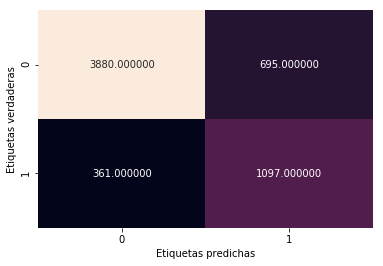

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False,fmt="f")
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas');

In [36]:


export_graphviz(tree.estimators_[0],
                feature_names=data.columns.drop("target"),
                filled=True)
import os
os.system('dot -Tpng tree.dot -o tree.png')

/opt/conda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


0

In [32]:
len(tree.estimators_) 

200

In [20]:
data.columns.drop("target")

Index(['workclass_num', 'education_num', 'marital_status_num',
       'occupation_num', 'relationship_num', 'sex_num', 'capital_loss',
       'capital_gain', 'US', 'age_cuartiles_(16.999, 28.0]',
       'age_cuartiles_(28.0, 37.0]', 'age_cuartiles_(37.0, 47.0]',
       'age_cuartiles_(47.0, 90.0]', 'cat_trabajo_Igual a 40',
       'cat_trabajo_Mayor a 40', 'cat_trabajo_Menos 40'],
      dtype='object')

In [97]:
test_femenino = test.copy()
test_femenino["sex_num"] = test_femenino["sex_num"].apply(lambda x : 1,)
test_masculino = test_femenino.copy()
test_masculino["sex_num"] = test_masculino["sex_num"].apply(lambda x : 0,)

In [98]:
test_femenino = pd.get_dummies(test_femenino)
test_masculino = pd.get_dummies(test_masculino)

In [99]:
y_fem = test_femenino.target
X_fem = test_femenino.drop("target",axis = 1)

y_masc = test_masculino.target
X_masc = test_masculino.drop("target",axis = 1)

In [90]:
test_masculino

,workclass_num,education_num,marital_status_num,occupation_num,relationship_num,sex_num,capital_loss,capital_gain,US,"age_cuartiles_(16.999, 28.0]","age_cuartiles_(28.0, 37.0]","age_cuartiles_(37.0, 47.0]","age_cuartiles_(47.0, 90.0]",cat_trabajo_Igual a 40,cat_trabajo_Mayor a 40,cat_trabajo_Menos 40,target
0,2,7,0,4,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,10,3,6,2,0,0,0,1,1,0,0,0,0,0,1,0
2,0,9,1,6,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0,13,4,0,4,0,0,0,1,0,1,0,0,1,0,0,0
4,2,9,3,1,2,0,0,0,1,1,0,0,0,0,1,0,0
5,4,10,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
6,0,14,4,6,5,0,0,0,1,1,0,0,0,1,0,0,0
7,0,10,1,7,0,0,0,27828,1,0,0,1,0,0,1,0,1
8,0,9,4,0,4,0,0,0,1,0,1,0,0,0,1,0,1
9,3,9,4,5,4,0,0,0,1,0,0,0,1,0,1,0,1


In [91]:
test_femenino

,workclass_num,education_num,marital_status_num,occupation_num,relationship_num,sex_num,capital_loss,capital_gain,US,"age_cuartiles_(16.999, 28.0]","age_cuartiles_(28.0, 37.0]","age_cuartiles_(37.0, 47.0]","age_cuartiles_(47.0, 90.0]",cat_trabajo_Igual a 40,cat_trabajo_Mayor a 40,cat_trabajo_Menos 40,target
0,2,7,0,4,0,1,0,0,1,0,0,1,0,1,0,0,0
1,0,10,3,6,2,1,0,0,1,1,0,0,0,0,0,1,0
2,0,9,1,6,0,1,0,0,1,0,0,0,1,0,0,1,0
3,0,13,4,0,4,1,0,0,1,0,1,0,0,1,0,0,0
4,2,9,3,1,2,1,0,0,1,1,0,0,0,0,1,0,0
5,4,10,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
6,0,14,4,6,5,1,0,0,1,1,0,0,0,1,0,0,0
7,0,10,1,7,0,1,0,27828,1,0,0,1,0,0,1,0,1
8,0,9,4,0,4,1,0,0,1,0,1,0,0,0,1,0,1
9,3,9,4,5,4,1,0,0,1,0,0,0,1,0,1,0,1


In [95]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [100]:
y_pred_f = knn.predict(X_fem)
y_pred_m = knn.predict(X_masc)


Tree

In [93]:
y_pred_f.sum()

12496

In [94]:
y_pred_m.sum()

10221

Knn

In [101]:
y_pred_f.sum()

4044

In [102]:
y_pred_m.sum()

4257

<BarContainer object of 2 artists>

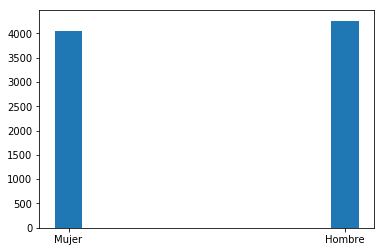

In [117]:
plt.bar(("Mujer","Hombre"),(4044,4257),width =0.1)

In [103]:
estimator = LogisticRegression()
selector = RFECV(estimator, step=2, cv=2,n_jobs=-1)
selector = selector.fit(X, y)
y_pred = selector.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.80      0.86      4575
          1       0.56      0.82      0.67      1458

avg / total       0.84      0.80      0.81      6033



In [104]:
y_pred_f = selector.predict(X_fem)
y_pred_m = selector.predict(X_masc)

In [105]:
y_pred_f.sum()

5948

In [106]:
y_pred_m.sum()

5948

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

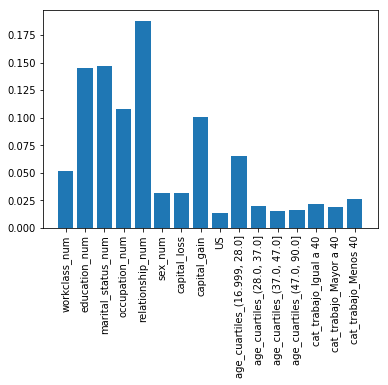

In [115]:
plt.bar(data.columns.drop("target"),tree.feature_importances_,orientation="vertical")
plt.xticks(rotation = "vertical")

In [110]:
data.columns

Index(['workclass_num', 'education_num', 'marital_status_num',
       'occupation_num', 'relationship_num', 'sex_num', 'capital_loss',
       'capital_gain', 'US', 'age_cuartiles_(16.999, 28.0]',
       'age_cuartiles_(28.0, 37.0]', 'age_cuartiles_(37.0, 47.0]',
       'age_cuartiles_(47.0, 90.0]', 'cat_trabajo_Igual a 40',
       'cat_trabajo_Mayor a 40', 'cat_trabajo_Menos 40', 'target'],
      dtype='object')